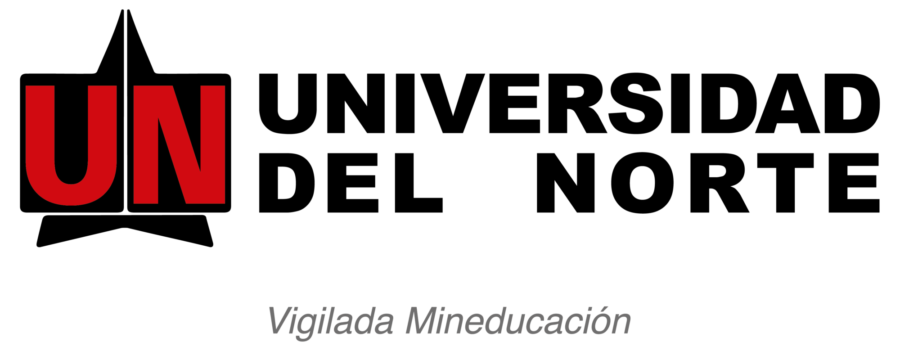

**IST7420 - Optimización**

Proyecto Final: Reconocimiento de patrones con machine learning o deep learning aplicados a la salud y bienestar

\\
**Presentado a:**

Ph.D Margarita Gamarra Acosta

**Presentado por:**

1.   Maria Alejandra Del Toro Rodriguez
2.   Luisa Fernanda Guzman Santoya
3.   David Hernandez Mosquera
4.   Maria Isabel Solá Valle
5.   Kevin Jesus Torregrosa Padilla




# Sobre el Dataset Seleccionado...
---



>El dataset seleccionado fue "*Diabetes Prediction
for Pima Women*" obtenido de [kaggle](https://www.kaggle.com/code/zabihullah18/diabetes-prediction) Este dataset contiene datos de mujeres indígenas Pima, como edad, glucosa, presión arterial y más, para predecir la presencia de diabetes mediante análisis y modelos de aprendizaje automático.

# Configuraciones Iniciales...
---



`Importacion de librerias`







In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib
import warnings
import random
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
styled_df = df.head(5).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


In [ ]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

# Analisis Exploratorio


---


1. ***Número de muestras:*** 768.
2.  ***Número de características:*** 9.
3. ***Columnas:*** '*Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'.*
4. ***Tipos de datos:***
  *  Variables como *'Pregnancies'*, *'Glucose'*, *'BloodPressure'*, *'SkinThickness'*, *'Insulin'*,* 'Age'*  son enteros.
  * *'BMI'* y *'DiabetesPedigreeFunction'* son flotantes.
  * *'Outcome'* es una variable categórica representada como entero, donde 1 indica diabetes y 0 no diabetes.

5. ***Balance de clases:***
  * ***Clase 0 (No diabetes):*** 65.10%.
  * Clase 1 (Diabetes): ***texto en negrita*** 34.90%.





<h2>Datos Nulos

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


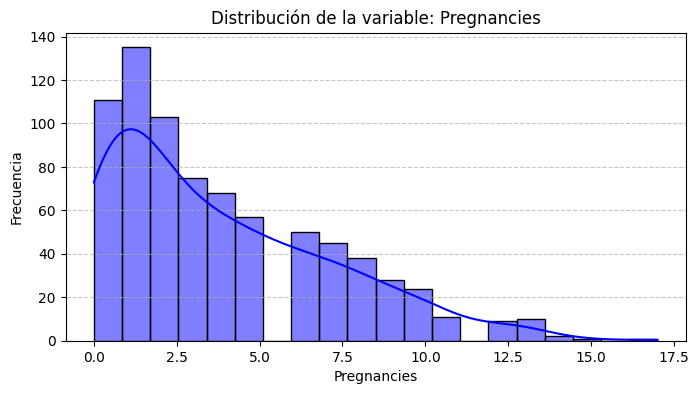

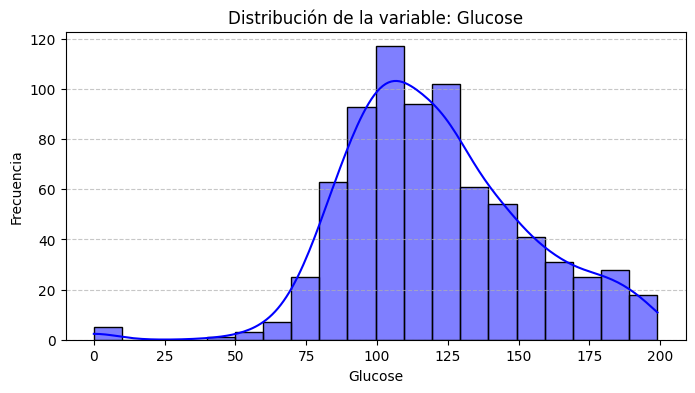

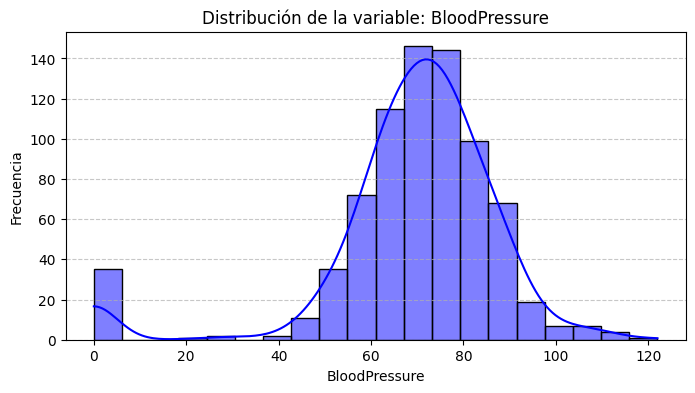

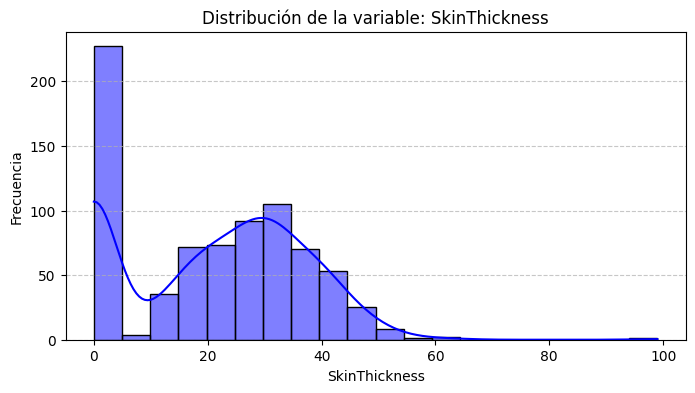

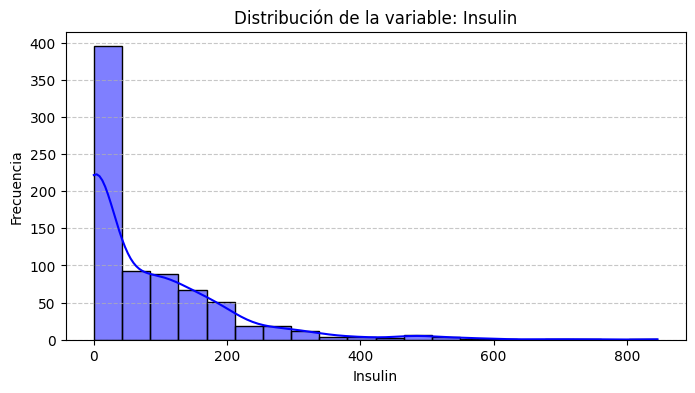

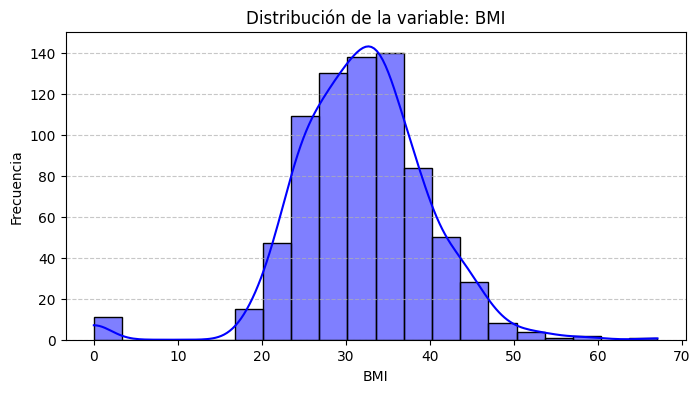

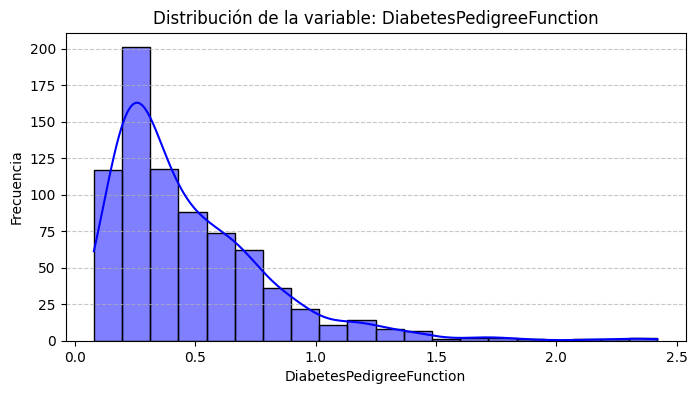

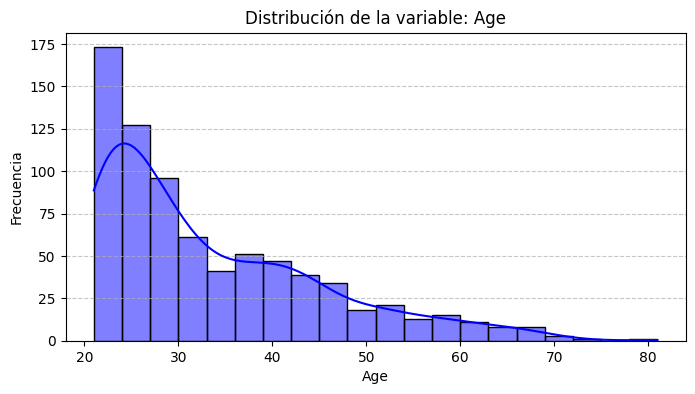

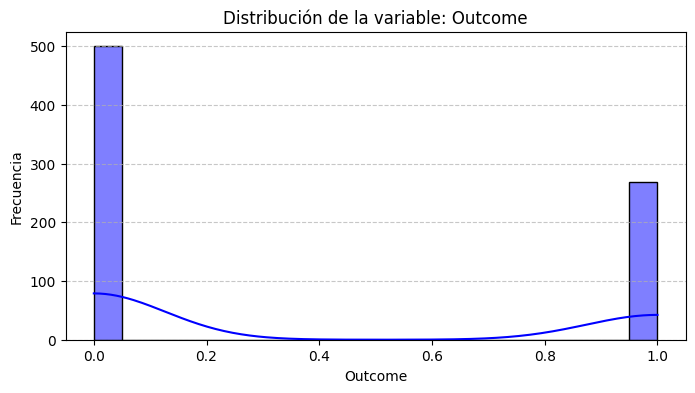

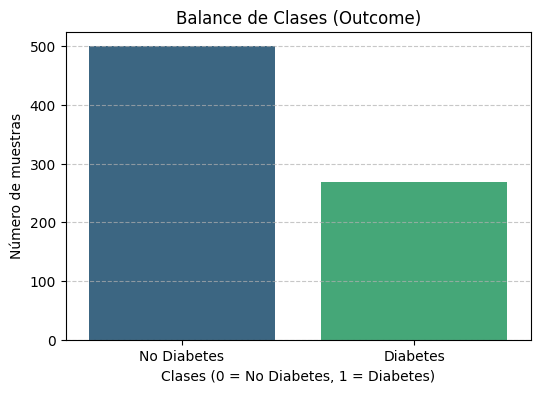

In [ ]:
# histogramas para cada variable numérica
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribución de la variable: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Balance de clases (Outcome)
if 'Outcome' in df.columns:
    class_counts = df['Outcome'].value_counts()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
    plt.title('Balance de Clases (Outcome)')
    plt.xlabel('Clases (0 = No Diabetes, 1 = Diabetes)')
    plt.ylabel('Número de muestras')
    plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


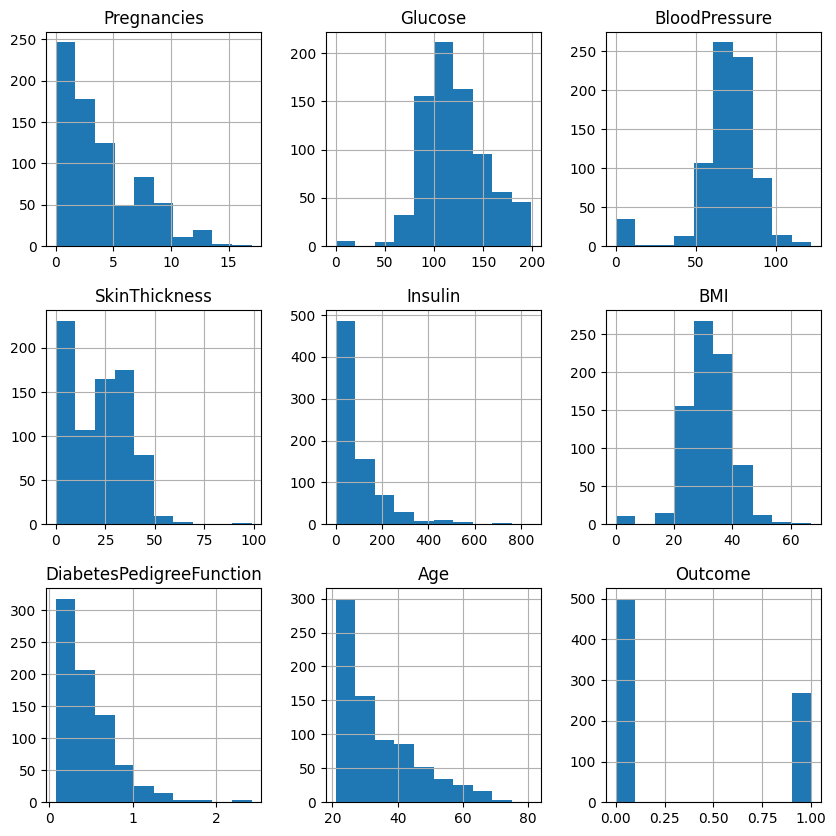

In [ ]:
df.hist(figsize = (10,10))
plt.show()


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import pandas as pd

# Count the occurrences of each number of pregnancies
pregnancy_counts = df['Pregnancies'].value_counts().sort_index()
# Print the results
pregnancy_counts

,count
Pregnancies,
0,111
1,135
2,103
3,75
4,68
5,57
6,50
7,45
8,38


#RandomForest

## Construcción Modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=10)

In [ ]:
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 10)
model_2.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=10)

In [ ]:
print(model_2.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}


##Pruebas

Accuracy: 100.00%
Accuracy: 77.27%


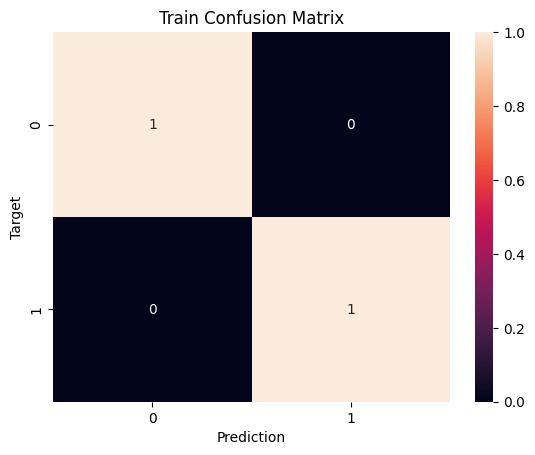

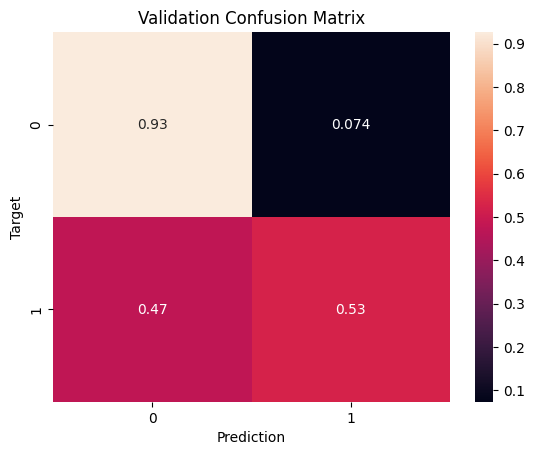

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

#funcion tomada y adaptada de kaggle diabetes
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds

# predecir con datos de entrenamiento
train_preds = predict_and_plot(model_2, X_train, y_train, 'Train')

# predecir con datos nuevos (kaggle los llamaba de validación por error)
val_preds = predict_and_plot(model_2, X_test, y_test, 'Validation')

In [ ]:
def precisionRecall(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    precision = precision_score(targets, preds)
    recall = recall_score(targets, preds)
    print("Precision: {:.2f}%".format(precision * 100))
    recall = recall_score(targets, preds)
    print("Recall: {:.2f}%".format(recall * 100))

In [ ]:
precisionRecall(model_2,X_test,y_test)

Precision: 81.58%
Recall: 52.54%


#NN

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix # Import accuracy_score
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

### Prueba

In [ ]:
import numpy as np

def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    # Convert predictions to binary (0 or 1) using a threshold
    preds = np.round(preds) # or (preds > 0.5).astype(int)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

In [ ]:
def show_accuracy(model, inputs,targets):
    preds = model.predict(inputs)
    # Convert predictions to binary (0 or 1) using a threshold
    preds = np.round(preds) # or (preds > 0.5).astype(int)

    accuracy = accuracy_score(targets, preds)
    print("Test Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
def show_other(model,inputs,targets):
    preds = model.predict(inputs)
    # Convert predictions to binary (0 or 1) using a threshold
    preds = np.round(preds) # or (preds > 0.5).astype(int)
    precision = precision_score(targets, preds)
    recall = recall_score(targets, preds)
    print("Precision: {:.2f}%".format(precision * 100))
    print("Recall: {:.2f}%".format(recall * 100))

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Experimentos

In [ ]:
def set_state():
  np.random.seed(1)  # For NumPy
  random.seed(1)
  tf.random.set_seed(1)  # For TensorFlow

In [ ]:
compile_params = {
    'optimizer': 'adam',
    'loss': 'binary_crossentropy',
    'metrics': ['accuracy']
}

In [ ]:
#loss, accuracy = model.evaluate(X_test, y_test)
#print(f"Test Accuracy: {accuracy:.4f}")

### Sin capa oculta

In [ ]:
set_state()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(**compile_params)

history = model.fit(X_train, y_train,
                    epochs=20, verbose=0,

                    )
print("Train Accuracy ",history.history["accuracy"][-1])
show_accuracy(model,X_test,y_test)

Train Accuracy  0.6205211877822876
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test Accuracy: 59.74%


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 62.87%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 59.74%


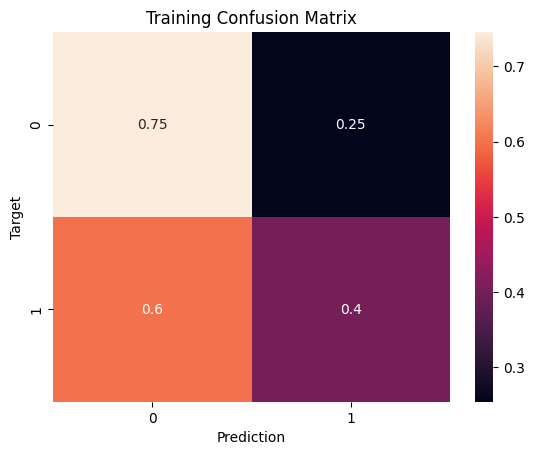

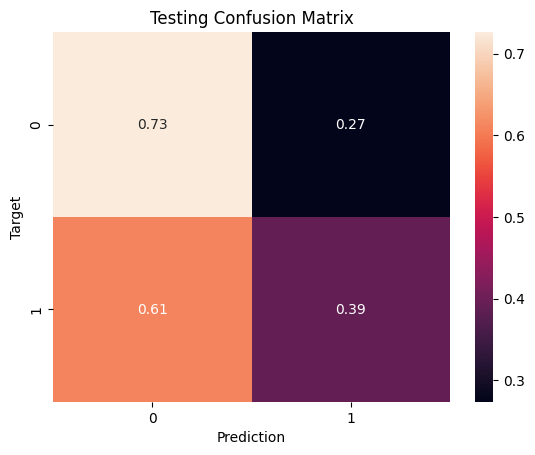

In [ ]:
predict_and_plot(model,X_train,y_train,name='Training')
predict_and_plot(model,X_test,y_test,name='Testing')

In [ ]:
show_other(model,X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Precision: 46.94%
Recall: 38.98%


### Una capa oculta, Diez neuronas, Veinte epocas




In [ ]:
set_state()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(**compile_params)

history = model.fit(X_train, y_train,
                    epochs=20, verbose=0,

                    )
print("Train Accuracy ",history.history["accuracy"][-1])
show_accuracy(model,X_test,y_test)

Train Accuracy  0.6856677532196045
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Test Accuracy: 65.58%


### Dos capas ocultas

In [ ]:
set_state()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(**compile_params)

history = model.fit(X_train, y_train,
                    epochs=20, verbose=0,
                    )
print("Train Accuracy ",history.history["accuracy"][-1])
show_accuracy(model,X_test,y_test)

Train Accuracy  0.6644951105117798
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Test Accuracy: 62.34%


In [ ]:
set_state()
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.20, random_state=10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(**compile_params)

history = model.fit(X_train, y_train,
                    epochs=20, verbose=0,

                    )
print("Train Accuracy ",history.history["accuracy"][-1])
show_accuracy(model,X_test,y_test)

Train Accuracy  0.7752442955970764
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test Accuracy: 68.83%


###Aumento de epocas a 100

In [ ]:
set_state()
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.20, random_state=10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(**compile_params)

history = model.fit(X_train, y_train,
                    epochs=100, verbose=0,
                    )
print("Train Accuracy ",history.history["accuracy"][-1])
show_accuracy(model,X_test,y_test)

Train Accuracy  0.8078175783157349
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Test Accuracy: 72.73%


###Aumento de epocas a 200




In [ ]:
set_state()
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.20, random_state=10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(**compile_params)

history = model.fit(X_train, y_train,
                    epochs=200, verbose=0,

                    )
print("Train Accuracy ",history.history["accuracy"][-1])
show_accuracy(model,X_test,y_test)

Train Accuracy  0.837133526802063
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test Accuracy: 74.68%


### Aplicación de validación, regularización y Early Stopping

In [ ]:
set_state()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

model = tf.keras.Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu',),
    Dense(1, activation='sigmoid')
])

model.compile(**compile_params)
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    verbose=0,epochs=150)

print("Train Accuracy ",history.history["accuracy"][-1])
show_accuracy(model,X_test,y_test)

Train Accuracy  0.8173912763595581
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test Accuracy: 75.32%


### Regularización L2 en capas, parada temprana basada en pérdidad de validación

In [ ]:
set_state()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
model = tf.keras.Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(10, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

model.compile(**compile_params)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    verbose=0,epochs=150, callbacks=[early_stopping])

print("Train Accuracy ",history.history["accuracy"][-1])
show_accuracy(model,X_test,y_test)

Train Accuracy  0.791304349899292
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Accuracy: 83.12%


### Mejor Modelo

In [ ]:
set_state()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
model = tf.keras.Sequential([
    Dense(10, activation='relu',input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(10, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

model.compile(**compile_params)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    verbose=0,epochs=150, callbacks=[early_stopping])

print("Train Accuracy ",history.history["accuracy"][-1])
show_accuracy(model,X_test,y_test)

Train Accuracy  0.7978261113166809
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test Accuracy: 83.77%


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 79.57%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 83.77%


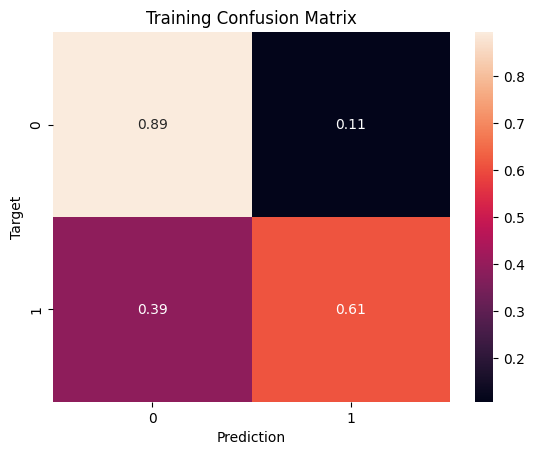

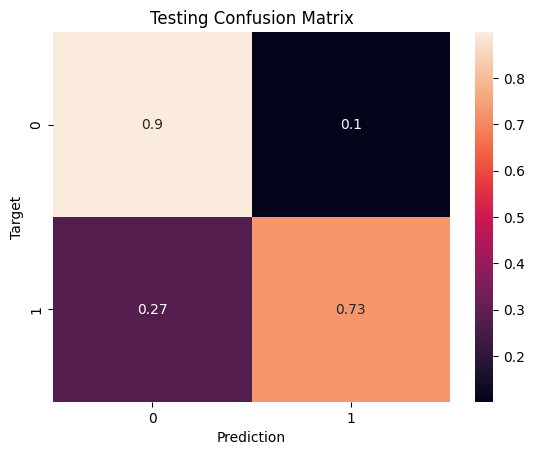

In [ ]:
predict_and_plot(model,X_train,y_train,name='Training')
predict_and_plot(model,X_test,y_test,name='Testing')

In [ ]:
show_other(model,X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Precision: 80.00%
Recall: 72.73%
